# PYTHON PACKAGES IMPORT

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# DATASET IMPORT

In [2]:
df = pd.read_csv('Sentinel_2.csv')
display(df)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label
0,0.343750,0.285714,0.312500,0.250000,0.339286,0.347222,0.363636,0.354167,0.377778,0.593744,...,0.730366,0.596619,0.549196,0.422650,0.540873,0.310542,0.362746,0.592950,0.393942,0
1,0.312500,0.257143,0.416667,0.333333,0.232143,0.222222,0.204545,0.409722,0.518519,0.326919,...,0.505021,0.327011,0.306424,0.684651,0.302727,0.303334,0.459418,0.305046,0.778388,0
2,0.250000,0.228571,0.354167,0.375000,0.303571,0.333333,0.352273,0.486111,0.525926,0.539529,...,0.751202,0.541906,0.381439,0.592315,0.398337,0.379622,0.296284,0.500241,0.507173,0
3,1.000000,0.971429,0.687500,0.687500,1.000000,0.944444,0.863636,0.229167,0.251852,0.584627,...,0.344354,0.588600,0.487632,0.068823,0.904945,0.569770,0.637515,0.638908,0.283333,0
4,0.492849,0.857143,0.604167,0.520833,0.553571,0.527778,0.465909,0.298611,0.259259,0.402276,...,0.325413,0.403707,0.724288,0.285088,0.741051,0.458558,0.840065,0.513761,0.257802,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28447,0.718750,0.657143,0.708333,0.500000,0.214286,0.208333,0.170455,0.444444,0.600000,0.017982,...,0.250996,0.015263,0.227058,0.796859,0.219139,0.420106,0.493426,0.126893,0.494843,0
28448,0.250000,0.171429,0.020833,0.000000,0.321429,0.430556,0.409091,0.111111,0.096296,0.993803,...,0.468493,0.999978,0.487632,0.112047,0.989685,0.114574,0.185514,0.497558,0.196154,0
28449,0.625000,0.600000,0.437500,0.416667,0.285714,0.263889,0.227273,0.270833,0.370370,0.331032,...,0.391383,0.331230,0.520796,0.448370,0.455555,0.274244,0.864535,0.408838,0.457692,1
28450,0.437500,0.428571,0.354167,0.437500,0.767857,0.736111,0.750000,0.298611,0.259259,0.781223,...,0.695098,0.787009,0.938651,0.154138,0.859580,0.433677,0.296284,0.806074,0.296047,0


In [3]:
df.dtypes

Blue     float64
Green    float64
Red      float64
VRE1     float64
VRE2     float64
VRE3     float64
NIR      float64
SWIR1    float64
SWIR2    float64
NDVI     float64
GNDVI    float64
EVI      float64
SAVI     float64
NDMI     float64
MSI      float64
NBRI     float64
BSI      float64
NDWI     float64
ARVI     float64
SIPI     float64
Label      int64
dtype: object

In [4]:
df.dtypes.value_counts()

float64    20
int64       1
Name: count, dtype: int64

In [5]:
df.dtypes.value_counts("Label")

float64    0.952381
int64      0.047619
Name: proportion, dtype: float64

# Preprocessing the data

## Seperate label from dataset

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Spilt Train & Test Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)
print(f'X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape:{y_test.shape}\n')

X_train Shape: (2845, 20)
X_test Shape: (25607, 20)
y_train Shape: (2845,)
y_test Shape:(25607,)



# ----- Deep Learning Model Deployment -----

## Build the deep learning model with the best batch size and Epoch

In [8]:
# Create a sequential model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',  # Adjust loss function for multi-class or regression
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=94, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/94
89/89 [==============================] - 5s 27ms/step - loss: 0.4619 - accuracy: 0.8123 - val_loss: 0.3642 - val_accuracy: 0.8382
Epoch 2/94
89/89 [==============================] - 2s 25ms/step - loss: 0.3652 - accuracy: 0.8369 - val_loss: 0.3635 - val_accuracy: 0.8389
Epoch 3/94
89/89 [==============================] - 2s 25ms/step - loss: 0.3571 - accuracy: 0.8411 - val_loss: 0.3578 - val_accuracy: 0.8432
Epoch 4/94
89/89 [==============================] - 2s 25ms/step - loss: 0.3514 - accuracy: 0.8499 - val_loss: 0.3543 - val_accuracy: 0.8446
Epoch 5/94
89/89 [==============================] - 3s 30ms/step - loss: 0.3505 - accuracy: 0.8460 - val_loss: 0.3782 - val_accuracy: 0.8347
Epoch 6/94
89/89 [==============================] - 2s 28ms/step - loss: 0.3496 - accuracy: 0.8460 - val_loss: 0.3498 - val_accuracy: 0.8472
Epoch 7/94
89/89 [==============================] - 2s 24ms/step - loss: 0.3502 - accuracy: 0.8503 - val_loss: 0.3490 - val_accuracy: 0.8478
Epoch 8/94
89

## Plot the loss and accuracy graphs

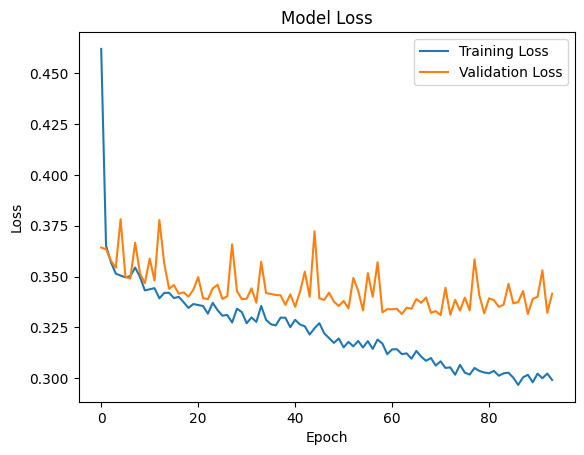

Maximum Training Loss  46.19 %
Maximum Validation Loss  37.82 %
Minimum Training Loss  29.67 %
Minimum Validation Loss  33.1 %


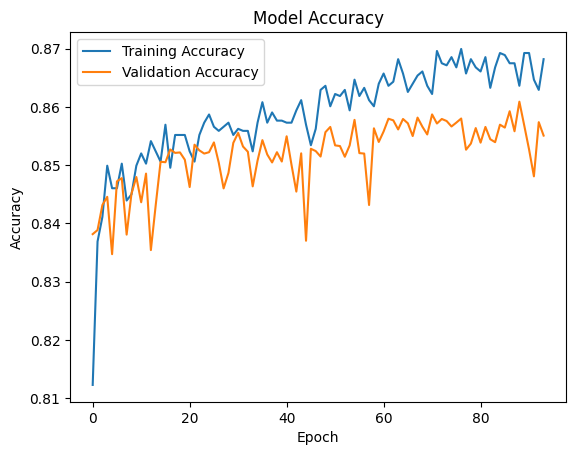

Maximum Training Accuracy  86.99 %
Maximum Validation Accuracy  86.09 %
Minimum Training Accuracy  81.23 %
Minimum Validation Accuracy  83.47 %


In [9]:
# Extract loss and accuracy from training and validation sets
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('Maximum Training Loss ', round(np.max(loss)*100,2), '%')
print('Maximum Validation Loss ', round(np.max(val_loss)*100,2), '%')
print('Minimum Training Loss ', round(np.min(loss)*100,2), '%')
print('Minimum Validation Loss ', round(np.min(val_loss)*100,2), '%')

# Plot the accuracy
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('Maximum Training Accuracy ', round(np.max(accuracy)*100,2), '%')
print('Maximum Validation Accuracy ', round(np.max(val_accuracy)*100,2), '%')
print('Minimum Training Accuracy ', round(np.min(accuracy)*100,2), '%')
print('Minimum Validation Accuracy ', round(np.min(val_accuracy)*100,2), '%')